# Setup (Run contents before running any experiment)

In [2]:
import scipy.io

# prereqs import
import pandas as pd
import numpy as np
import math
import re
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

# load matlab data
mat = scipy.io.loadmat('matlab/emnist-balanced')
mat.keys()
data = mat['dataset']

# see page 4 of the paper on emnist
# uncertain what 3rd entry is in dataset
X_train = data['train'][0,0]['images'][0,0]
y_train = data['train'][0,0]['labels'][0,0]
X_test = data['test'][0,0]['images'][0,0]
y_test = data['test'][0,0]['labels'][0,0]

# try proccessing data (pixel values from EMINST are not normalized, 0-255)
def rescale_DivideBy255(inputData):
    outputArray = []
    for i in range(len(inputData)):
        outputArray.append(inputData[i]/255)

    return outputArray

X_train_normalized = rescale_DivideBy255(X_train)
X_test_normalized = rescale_DivideBy255(X_test)

train_data = X_train_normalized
train_target = y_train
test_data = X_test_normalized
test_target = y_test

In [6]:
len(train_target)

112800

In [11]:
# use ski kit learns kcv method -> cross_val_score, take return type and get .mean()
# most of the code throws warnings unless specifically ignore
import warnings
warnings.filterwarnings('ignore')

# Test NN

In [ ]:
from sklearn import neural_network
testNN = neural_network.MLPClassifier(hidden_layer_sizes=(1,))
testNN.fit(train_data,train_target)

In [ ]:
# cv=2> results in kfold split using (Stratified)KFold/KFold from scikit learn
from sklearn.model_selection import cross_val_score
scores = cross_val_score(testNN,train_data,train_target,cv=2)

In [ ]:
#average accuracy across kfold cv
scores.mean()

In [ ]:
testNN.score(train_data,train_target)

In [ ]:
# save(pickle) the model for later. Save to disk
from joblib import dump,load
dump(testNN,'testPickleNN.joblib') #file name will be put in same folder as this notebook

## Test loading pickled model

In [ ]:
# test load pickeld model from disk
from joblib import load
testNN_2 = load('testPickleNN.joblib')
testNN_2.score(train_data,train_target)

# E0 - mock experiment scafold

### E0 - Setup

In [3]:
# setup global file names
# change these names to be unique
store_models_name = 'e0_simpleLayers_models.joblib'
store_results_name = 'e0_simpleLayers_results.joblib'

# define hyper parameter
# hidden_layer_sizes, naive experiment for fast demonstration of scafold
hp = [(1,),(2,),(3,)]

### E0 - training

In [ ]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [ ]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

### E0 - Model Evaluation

In [ ]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [ ]:
# store results
from joblib import dump
dump(result_y,store_results_name)

## E0 - Plot

In [4]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of nodes in the first(and only) hidden layer
plot_x = [item[0] for item in hp]

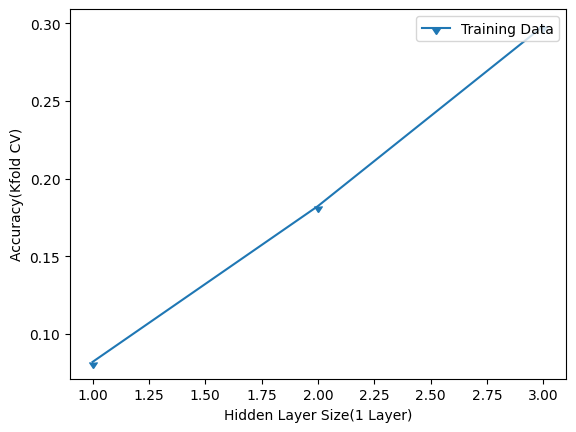

In [5]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Size(1 Layer)")
ax.set_ylabel("Accuracy(Kfold CV)")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.legend(loc='right')
plt.show()

# E1 - Epoch Number 1

### E1 - Setup

In [39]:
# setup global file names
# change these names to be unique
store_models_name = 'e1_iternum1_models.joblib'
store_results_name = 'e1_iternum1_results.joblib'

In [40]:
# define hyper parameter
# Iteration number, default is 200, get snap shot accuracies outside boundary
# number of times individual data point is used to train algorithm
hp = list(range(50,600,150))
hp

[50, 200, 350, 500]

### E1 - training

In [ ]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(max_iter=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [ ]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

### E1 - Model Evaluation

In [ ]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [ ]:
# store results
from joblib import dump
dump(result_y,store_results_name)

## E1 - Plot

In [41]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = hp

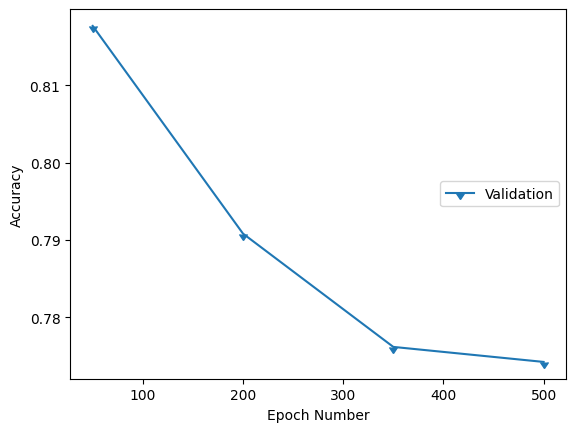

In [42]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Epoch Number")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.legend(loc='right')
plt.show()

# E2 - Layers Tuning 1 - Increasing Layer number
Try hyper parameter where number of hidden layers goes from 1 to 4. Try with number nodes = 100.

In [43]:
# setup global file names
store_models_name = 'e2_ltune1_models.joblib'
store_results_name = 'e2_ltune1_results.joblib'

# define hyper parameter
# hidden_layer number, size remains constant.
hp = [(100,),(100,100),(100,100,100),(100,100,100,100),(100,100,100,100,100)]

### E2 - training

In [ ]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [ ]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

### E2 - Model Evaluation

In [ ]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [ ]:
# store results
from joblib import dump
dump(result_y,store_results_name)

## E2 - Plot

In [44]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of hidden layers (size = 100)
plot_x = [len(item) for item in hp]

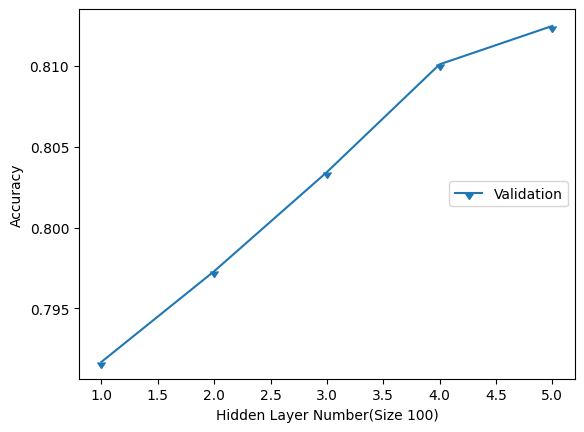

In [45]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Number(Size 100)")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.legend(loc='right')
plt.show()

We see from above that increasing layers had greater accuracy, we know as a benchmark 1000 node single layer had 83% accuracy.
We should try increasing the layers more and see when diminishing returns occurs

# E3 - Layers - Double size of layers(200), increasing layer number

### E3 - Setup

In [46]:
# setup global file names
# change these names to be unique
store_models_name = 'e3_1hiddenLayersSizeInc_models.joblib'
store_results_name = 'e3_1hiddenLayersSizeInc_results.joblib'

# define hyper parameter
# double size of layers from e2
layerSize = 200
hp = [(layerSize,),
      (layerSize,layerSize),
      (layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize,layerSize)
      ]
hp

[(200,),
 (200, 200),
 (200, 200, 200),
 (200, 200, 200, 200),
 (200, 200, 200, 200, 200)]

### E3 - Training

In [11]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [12]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

['e3_1hiddenLayersSizeInc_models.joblib']

### E3 - Model Evaluation

In [13]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [14]:
# store results
from joblib import dump
dump(result_y,store_results_name)

['e3_1hiddenLayersSizeInc_results.joblib']

## E3 - Plot

In [47]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = [len(item) for item in hp]

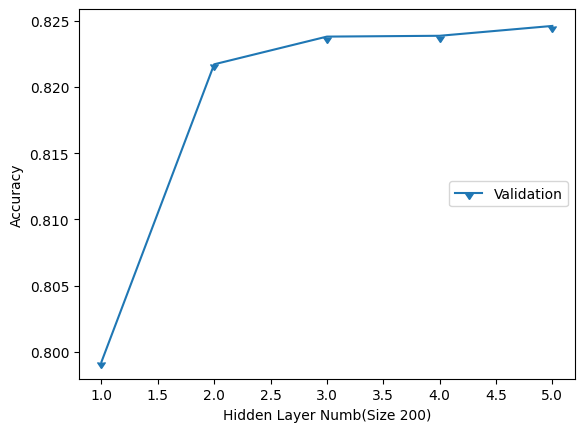

In [48]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Numb(Size 200)")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.legend(loc='right')
plt.show()

# E4 - Layers - Hidden Layers with high number of nodes

In [49]:
# setup global file names
# change these names to be unique
store_models_name = 'e4_hiddenLayersNumber_models.joblib'
store_results_name = 'e4_hiddenLayersNumber_results.joblib'

# define hyper parameter
# 2 hidden layer of increasing size
# double size of layers from e3
layerSize = 400
hp = [(layerSize,),
      (layerSize,layerSize),
      (layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize,layerSize)
      ]
hp

[(400,),
 (400, 400),
 (400, 400, 400),
 (400, 400, 400, 400),
 (400, 400, 400, 400, 400)]

### E4 - training

In [5]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

NameError: name 'hp' is not defined

In [24]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

['e4_hiddenLayersNumber_models.joblib']

### E4 - model eval

In [8]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [9]:
# store results
from joblib import dump
dump(result_y,store_results_name)

['e4_hiddenLayersNumber_results.joblib']

## E4 - Plot

In [50]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = [len(item) for item in hp]

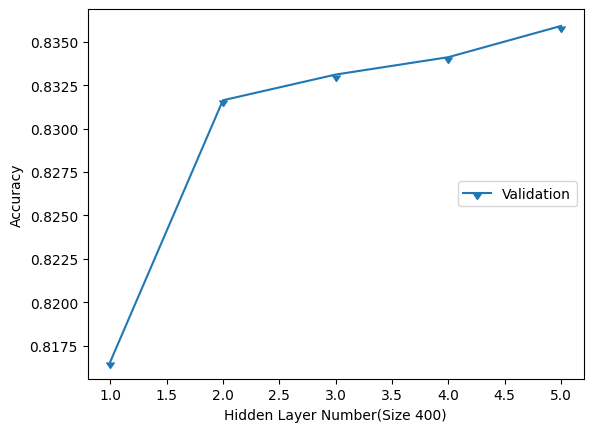

In [51]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Number(Size 400)")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.legend(loc='right')
plt.show()

# E5 - 2 Large Size Layers of increasing size

Observe trend that maximum accuracy on kfold cv is occuring at 2 layers. and is occuring repeatedly in each of above experiments.
Does this trend continue?

In [52]:
# setup global file names
# change these names to be unique
store_models_name = 'e5_2layersIncDensity_models.joblib'
store_results_name = 'e5_2layersIncDensity.joblib'

In [53]:
# define hyper parameter
# double size of layers from e2
layerSize = 400
hp = [
      (layerSize+100,layerSize+100),
      (layerSize+200,layerSize+200),
      (layerSize+300,layerSize+300)
      ]
hp

[(500, 500), (600, 600), (700, 700)]

## E5 - training

In [29]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [30]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

['e5_2layersIncDensity_models.joblib']

## E5 - Model Evaluation

In [31]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [32]:
# store results
from joblib import dump
dump(result_y,store_results_name)

['e5_2layersIncDensity.joblib']

## E5 - Plot

In [54]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = [item[0] for item in hp]

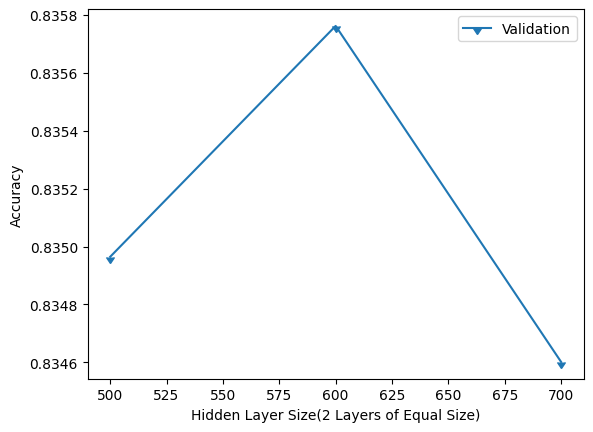

In [55]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Size(2 Layers of Equal Size)")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.legend(loc='upper right')
plt.show()

# E6 Epoch Number with Tuned Layers

In [56]:
# setup global file names
store_models_name = 'e6_epochLayer_models.joblib'
store_results_name = 'e6_epochLayer_results.joblib'

# define hyper parameter
# hidden_layer number, size remains constant.
hp_epoch_number = list(range(50,200,50))
hp_layers = (600,600)
hp_epoch_number

[50, 100, 150]

## e6 - training

In [12]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp_epoch_number:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=hp_layers,max_iter=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [13]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

['e6_epochLayer_models.joblib']

## E6 - model eval

In [14]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [15]:
# store results
from joblib import dump
dump(result_y,store_results_name)

['e6_epochLayer_results.joblib']

## e6 - plot

In [57]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = hp_epoch_number

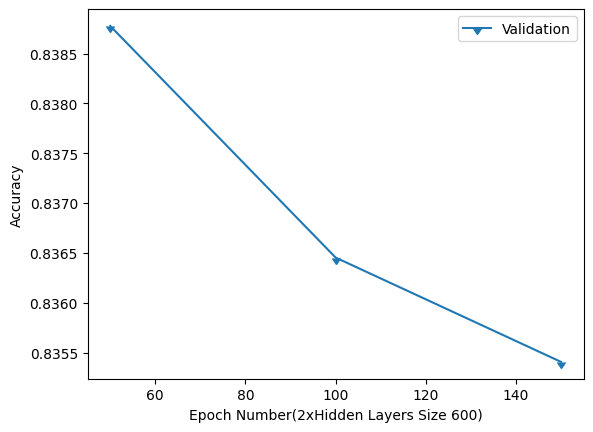

In [59]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Epoch Number(2xHidden Layers Size 600)")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.legend(loc='upper right')
plt.show()

## test set

In [68]:
# setup global file names
store_models_name = 'e6_epochLayer_models.joblib'
store_results_name = 'e6_epochLayer_results.joblib'

# define hyper parameter
# hidden_layer number, size remains constant.
hp_epoch_number = list(range(50,200,50))
hp_layers = (600,600)
hp_epoch_number

[50, 100, 150]

In [69]:
# evaulate e4 models on test set
from joblib import load
from sklearn.model_selection import cross_val_score

result_y_test = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y_test.append(load_trainedModels[i].score(test_data,test_target))

In [70]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = hp_epoch_number

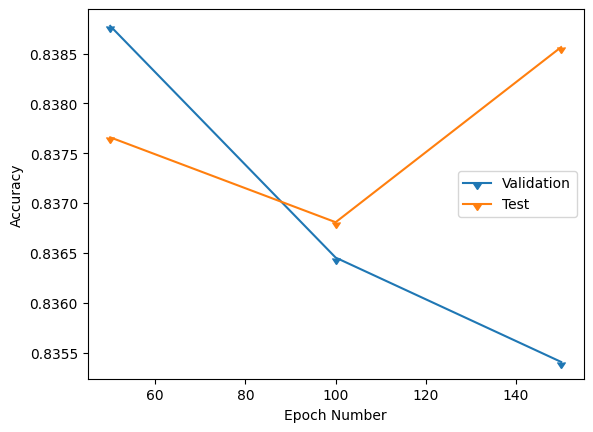

In [71]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Epoch Number")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.plot(plot_x, result_y_test,label="Test",marker=11)
ax.legend(loc='right')

# e7

In [13]:
# setup global file names
store_models_name = 'e7_moreLayers_models.joblib'
store_results_name = 'e7_moreLayers_results.joblib'

# define hyper parameter
# hidden_layer number, size remains constant.
ls = 400
hp = [(layerSize,layerSize,layerSize,layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize,layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize,layerSize,layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize,layerSize,layerSize,layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize,layerSize,layerSize,layerSize,layerSize,layerSize,layerSize),
      ]

In [14]:
hp_len = [len(item) for item in hp]
hp_len

[6, 7, 8, 9, 10]

## E7 Train

In [15]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

c:\Users\hunter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hunter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\hunter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

## E7 Eval

In [ ]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [ ]:
# store results
from joblib import dump
dump(result_y,store_results_name)

## E7 - Plot

In [ ]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = [len(item) for item in hp]

In [ ]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Number(Size 400)")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.legend(loc='right')
plt.show()

# Final (go to moon) and test tuned models on test set

# E1 on test set

In [34]:
# setup global file names
# change these names to be unique
store_models_name = 'e1_iternum1_models.joblib'
store_results_name = 'e1_iternum1_results.joblib'
hp = list(range(50,600,150))
hp

[50, 200, 350, 500]

In [35]:
# evaulate e1 models on test set
from joblib import load
from sklearn.model_selection import cross_val_score

result_y_test = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y_test.append(load_trainedModels[i].score(test_data,test_target))

In [36]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = hp

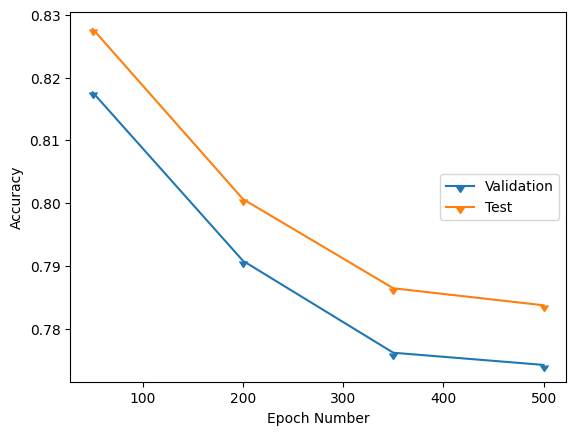

In [38]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Epoch Number")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.plot(plot_x, result_y_test,label="Test",marker=11)
ax.legend(loc='right')
plt.show()

## Baseline Accuracy test - default

In [82]:
store_models_name = 'baseline_accuracy_default_mlp_model.joblib'
store_results_name = 'baseline_accuracy_default_mlp_result.joblib'

In [83]:
nn_characterClassifier = neural_network.MLPClassifier()
nn_characterClassifier.fit(train_data,train_target)
baseline_default_nn_model = nn_characterClassifier


In [84]:
from joblib import dump
dump(baseline_default_nn_model,store_models_name)

['baseline_accuracy_default_mlp_model.joblib']

In [86]:
load_trainedModel = load(store_models_name)
baseline_deafult_score_training = cross_val_score(load_trainedModel,X=train_data,y=train_target,cv=5).mean()

In [87]:
load_trainedModel = load(store_models_name)
baseline_deafult_score_test = load_trainedModel.score(test_data,test_target)

In [88]:
baseline_deafult_score_training

0.7892641843971633

In [89]:
baseline_deafult_score_test

0.7962234042553191

In [90]:
basline_default_scores = (baseline_deafult_score_training,baseline_deafult_score_test)

from joblib import dump
dump(basline_default_scores,store_results_name)

['baseline_accuracy_default_mlp_result.joblib']

## Baseline Accuracy - 1000 Size Hidden Layer defaults

In [18]:
store_models_name = 'baseline_accuracy_1000_mlp_model.joblib'
store_results_name = 'baseline_accuracy_1000_mlp_result.joblib'

In [92]:
nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=(1000,))
nn_characterClassifier.fit(train_data,train_target)
baseline_default_nn_model = nn_characterClassifier

In [93]:
from joblib import dump
dump(baseline_default_nn_model,store_models_name)

['baseline_accuracy_1000_mlp_model.joblib']

In [19]:
load_trainedModel = load(store_models_name)
baseline_deafult_score_training = cross_val_score(load_trainedModel,X=train_data,y=train_target,cv=5).mean()

In [20]:
load_trainedModel = load(store_models_name)
baseline_deafult_score_test = load_trainedModel.score(test_data,test_target)

In [21]:
basline_default_scores = (baseline_deafult_score_training,baseline_deafult_score_test)

from joblib import dump
dump(basline_default_scores,store_results_name)

['baseline_accuracy_1000_mlp_result.joblib']

In [22]:
baseline_deafult_score_training

0.8304609929078014

In [23]:
baseline_deafult_score_test

0.8355851063829787

# Baseline Plus

## E5 on test set

In [64]:
# setup global file names
# change these names to be unique
store_models_name = 'e5_2layersIncDensity_models.joblib'
store_results_name = 'e5_2layersIncDensity.joblib'

# define hyper parameter
# double size of layers from e2
layerSize = 400
hp = [
      (layerSize+100,layerSize+100),
      (layerSize+200,layerSize+200),
      (layerSize+300,layerSize+300)
      ]
hp

[(500, 500), (600, 600), (700, 700)]

In [65]:
# evaulate e4 models on test set
from joblib import load
from sklearn.model_selection import cross_val_score

result_y_test = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y_test.append(load_trainedModels[i].score(test_data,test_target))

In [66]:
result_y_test

[0.839627659574468, 0.8375531914893617, 0.8427127659574468]

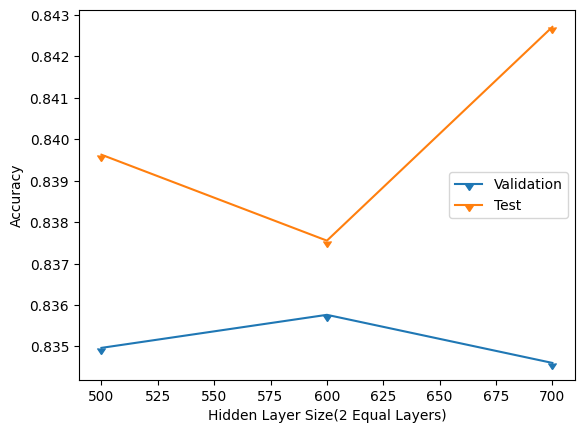

In [67]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = [item[0] for item in hp]

# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Size(2 Equal Layers)")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.plot(plot_x, result_y_test,label="Test",marker=11)

ax.legend(loc='right')
plt.show()

## E2 On test set

In [76]:
# setup global file names
store_models_name = 'e2_ltune1_models.joblib'
store_results_name = 'e2_ltune1_results.joblib'

# define hyper parameter
# hidden_layer number, size remains constant.
hp = [(100,),(100,100),(100,100,100),(100,100,100,100),(100,100,100,100,100)]

In [77]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of hidden layers (size = 100)
plot_x = [len(item) for item in hp]

In [78]:
# evaulate e4 models on test set
from joblib import load
from sklearn.model_selection import cross_val_score

result_y_test = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y_test.append(load_trainedModels[i].score(test_data,test_target))

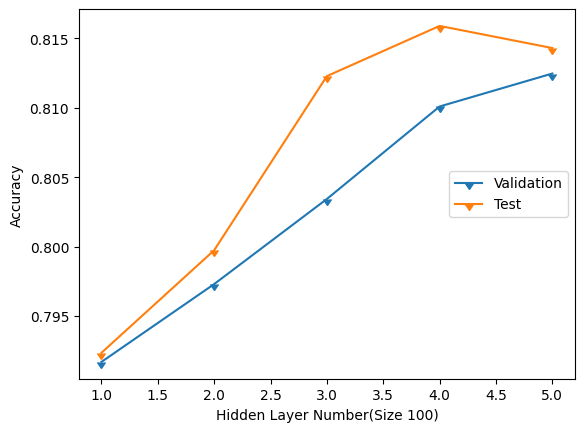

In [79]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Number(Size 100)")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.plot(plot_x, result_y_test,label="Test",marker=11)
ax.legend(loc='right')
plt.show()

## e3

In [80]:
# setup global file names
# change these names to be unique
store_models_name = 'e3_1hiddenLayersSizeInc_models.joblib'
store_results_name = 'e3_1hiddenLayersSizeInc_results.joblib'

# define hyper parameter
# double size of layers from e2
layerSize = 200
hp = [(layerSize,),
      (layerSize,layerSize),
      (layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize,layerSize)
      ]
hp

[(200,),
 (200, 200),
 (200, 200, 200),
 (200, 200, 200, 200),
 (200, 200, 200, 200, 200)]

In [81]:
# evaulate e4 models on test set
from joblib import load
from sklearn.model_selection import cross_val_score

result_y_test = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y_test.append(load_trainedModels[i].score(test_data,test_target))

In [82]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = [len(item) for item in hp]

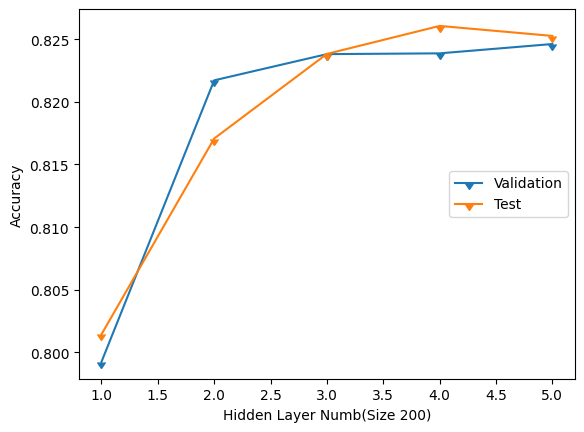

In [84]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Numb(Size 200)")
ax.set_ylabel("Accuracy")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.plot(plot_x, result_y_test,label="Test",marker=11)
ax.legend(loc='right')
plt.show()

## E4 on test set

In [7]:
# setup global file names
# change these names to be unique
store_models_name = 'e4_hiddenLayersNumber_models.joblib'
store_results_name = 'e4_hiddenLayersNumber_results.joblib'

# define hyper parameter
# 2 hidden layer of increasing size
# double size of layers from e3
layerSize = 400
hp = [(layerSize,),
      (layerSize,layerSize),
      (layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize,layerSize)
      ]
hp

[(400,),
 (400, 400),
 (400, 400, 400),
 (400, 400, 400, 400),
 (400, 400, 400, 400, 400)]

In [8]:


# evaulate e4 models on test set
from joblib import load
from sklearn.model_selection import cross_val_score

test_result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    test_result_y.append(load_trainedModels[i].score(test_data,test_target))

In [9]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)
test_plot_y = test_result_y

# Set x points to number of iterations
plot_x = [len(item) for item in hp]

In [11]:
test_plot_y

[0.8183510638297873,
 0.8363829787234043,
 0.8328723404255319,
 0.8339893617021277,
 0.8386702127659574]

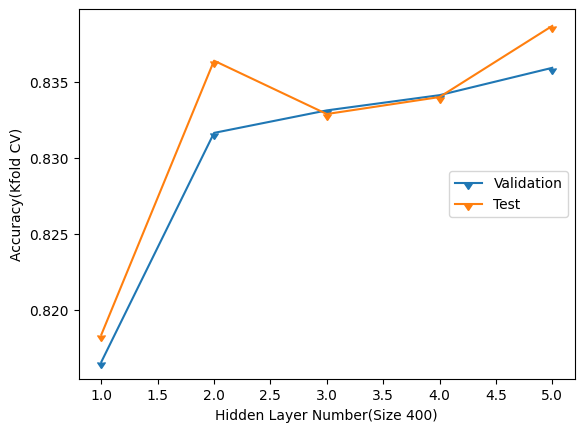

In [10]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Number(Size 400)")
ax.set_ylabel("Accuracy(Kfold CV)")
ax.plot(plot_x, plot_y,label="Validation",marker=11)
ax.plot(plot_x, test_plot_y,label="Test",marker=11)
ax.legend(loc='right')
plt.show()